In [1]:
# import the libraries
import pathlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Start working on a real dataset

We're going to use the House Price dataset we used last time ([link text](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv))

We can access the data in collab by mounting our [google drive](https://colab.research.google.com/notebooks/io.ipynb) or by using the kaggle API as per the below. 

In [2]:
### Constants
_DATA_PATH = pathlib.Path("../data") / "lab-2"  # Note functionality of division operator (__truediv__) on Path objects
_DATA_PATH

WindowsPath('../data/lab-2')

In [3]:
# Optional, import data with kaggle API
try: 
    import kaggle
    kaggle.api.authenticate()
    kaggle.api.competition_download_files('house-prices-advanced-regression-techniques', path=_DATA_PATH)
except ModuleNotFoundError as e:
    print("Kaggle not installed, use 'pip install kaggle' or " 
          "'conda install -c conda-forge kaggle' and restart Jupyter kernel. "
          "Otherwise, download data and place in folder above manually"
    )
    print(e.message())
except Exception as e:
    raise e
    

We can unzip with:
* magic bash command in juptyer cell: `%%bash unzip ../data/lab-2/house-prices-advanced-regression-techniques.zip -d ../data/lab-2`
* or use `zipfile` pypi package as per the below

In [4]:
import zipfile
fname = "house-prices-advanced-regression-techniques.zip"
with zipfile.ZipFile(_DATA_PATH / fname, "r") as handle:
    handle.extractall(_DATA_PATH)

In [5]:
list(_DATA_PATH.glob(("*")))

[WindowsPath('../data/lab-2/data_description.txt'),
 WindowsPath('../data/lab-2/house-prices-advanced-regression-techniques.zip'),
 WindowsPath('../data/lab-2/sample_submission.csv'),
 WindowsPath('../data/lab-2/test.csv'),
 WindowsPath('../data/lab-2/train.csv')]

Now that we have our data, we can proceed!

In [6]:
# find the file on your system and copy and paste the path here
_FILE_PATH = _DATA_PATH / "train.csv"
df = pd.read_csv(_FILE_PATH, index_col="Id")

In [7]:
# show all the columns
pd.set_option('display.max_columns', None)

In [8]:
# print the shape of the dataset
df.shape

(1460, 80)

In [9]:
# check the data types
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [10]:
# take a look at the first few records
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
# take a look at the columns
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

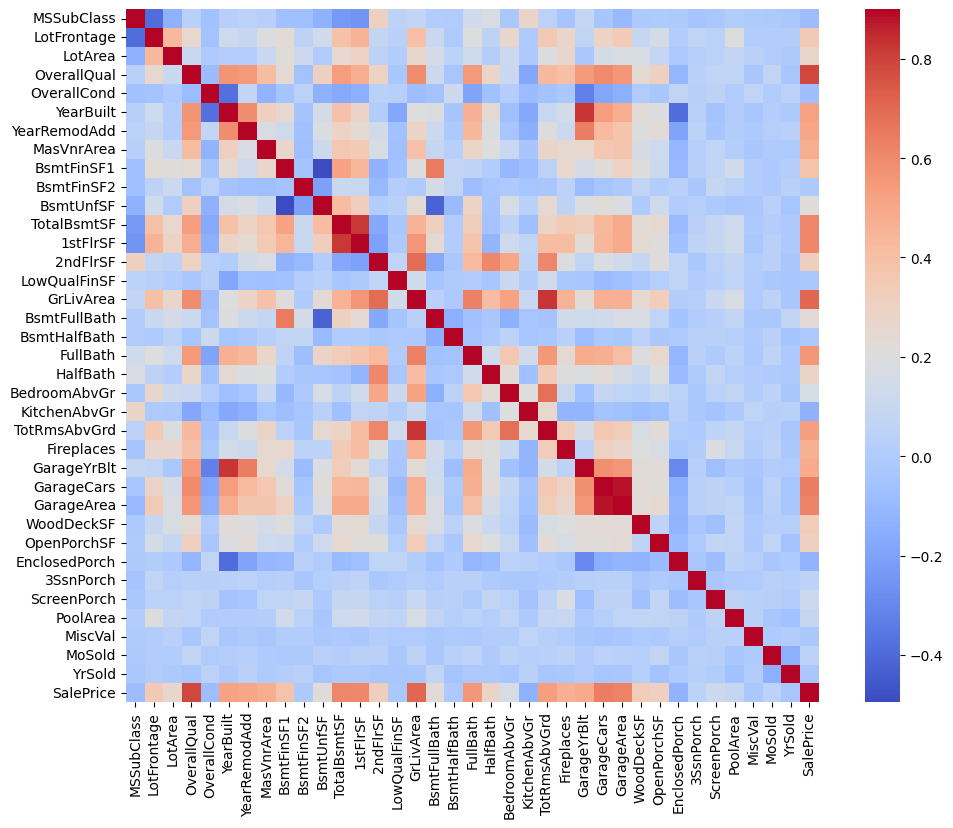

In [12]:
# look at the correlation of columns with .corr()
corrmat = df.corr(numeric_only=True)

# plot the correlations with sns.heatmap
fig, ax = plt.subplots(figsize=(12,9))
_ = sns.heatmap(corrmat, vmax=0.9, square=True, cmap='coolwarm', ax=ax)

**Note** that non-numeric features are dropped from correlation matrix when numeric_only=True. Watch out as this behavior changed in Pandas 2.0! If you have <=1.50 installed you may have some issues with the above cell, refer to pandas docs. 

# What conclusions can be made based on the above correlation matrix?

The highest corrolations are with the following columns:
 Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')


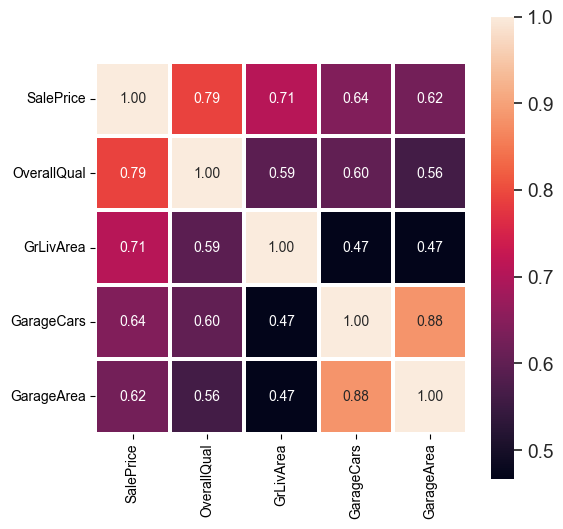

In [13]:
# run the code bellow to have a better view of correlations
from typing import Tuple, List
def plot_corr_matrix(df, nr_c, targ) -> Tuple[plt.Figure, List[str]]: 
    """A function for getting the features with the highest correlation with the
    target variable.
    
    Returns:
        Tuple of plt.Figure correlation matrix and list of top nr_c columns 
        correlated with targ. 
    """

    # get the values
    corr = df.corr(numeric_only=True)
    corr_abs = corr.abs()

    # get the names in the largest to smallest order
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    # plot the figure
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.set(font_scale=1.25)
    ax = sns.heatmap(cm, linewidths=1.5, annot=True, square=True,
                fmt='.2f', annot_kws={'size': 10},
                yticklabels=cols.values, xticklabels=cols.values, ax=ax)
    print('The highest corrolations are with the following columns:\n', cols)
    return fig, cols

fig, cols = plot_corr_matrix(df, nr_c=5, targ='SalePrice')

In [14]:
### NOTE: Upgrade to seaborn=0.13.1 if you only see annotations in top row of above plot

In [15]:
# filter the above columns of the dataset and save the new dataset into df_sample
df_sample = df.loc[:, cols]
df_sample.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea
Id,,,,,
1,208500,7,1710,2,548
2,181500,6,1262,2,460
3,223500,7,1786,2,608
4,140000,7,1717,3,642
5,250000,8,2198,3,836


In [16]:
# look into the number of nulls we have in df_sample
nulls = df_sample.isnull().sum().sort_values(ascending=False)
nulls

SalePrice      0
OverallQual    0
GrLivArea      0
GarageCars     0
GarageArea     0
dtype: int64

In [17]:
df_sample

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea
Id,,,,,
1,208500,7,1710,2,548
2,181500,6,1262,2,460
3,223500,7,1786,2,608
4,140000,7,1717,3,642
5,250000,8,2198,3,836
...,...,...,...,...,...
1456,175000,6,1647,2,460
1457,210000,6,2073,2,500
1458,266500,7,2340,1,252


Text(0.5, 0, 'GrLivArea')

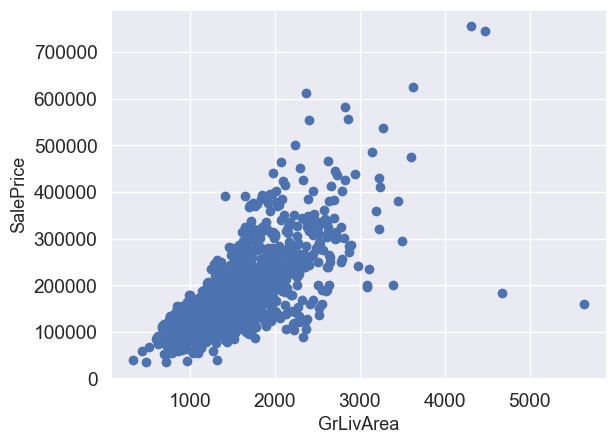

In [18]:
# plot GrLivArea against SalePrice with a scatter plot
fig, ax = plt.subplots()
ax.scatter(x = df_sample['GrLivArea'], y = df_sample['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)

Text(0.5, 0, 'GrLivArea')

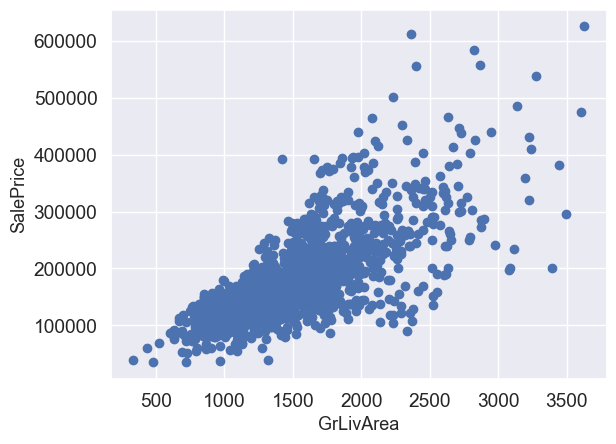

In [19]:
# Delete the outliers (ones that have GrLivArea more than 4000)
df_sample = df_sample.drop(df_sample[df_sample['GrLivArea']>4000].index)

# plot it again
fig, ax = plt.subplots()
ax.scatter(df_sample['GrLivArea'], df_sample['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)

In [20]:
df_sample.columns  ## NOTE: SalePrice is in here!

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')

In [21]:
# filter df_sample based on the x_column_names and your target name
X = df_sample.drop(columns=["SalePrice"])
y = df_sample["SalePrice"]

# build the train and test sets, use same random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# import the libraries for regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
# Initialize and train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
linear_predictions = linear_model.predict(X_test)

# Evaluate the model
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_predictions))

print("Linear Regression:")
print(f"Mean Absolute Error: {linear_mae}")
print(f"Root Mean Squared Error: {linear_rmse}")


Linear Regression:
Mean Absolute Error: 27366.421544437657
Root Mean Squared Error: 35584.99433110296


In [24]:
# Initialize and train a Ridge regression model
ridge_model = Ridge(alpha=0.2)  # You can tune the alpha parameter
ridge_model.fit(X_train, y_train)

# Make predictions
ridge_predictions = ridge_model.predict(X_test)

# Evaluate the model
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))

print("\nRidge Regression:")
print(f"Mean Absolute Error: {ridge_mae}")
print(f"Root Mean Squared Error: {ridge_rmse}")



Ridge Regression:
Mean Absolute Error: 27366.058664286866
Root Mean Squared Error: 35585.057140565674


In [25]:
# Initialize and train a Lasso regression model
lasso_model = Lasso(alpha=0.2, max_iter=100)  # You can tune the alpha parameter
lasso_model.fit(X_train, y_train)

# Make predictions
lasso_predictions = lasso_model.predict(X_test)

# Evaluate the model
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))

print("\nLasso Regression:")
print(f"Mean Absolute Error: {lasso_mae}")
print(f"Root Mean Squared Error: {lasso_rmse}")



Lasso Regression:
Mean Absolute Error: 27366.450021348413
Root Mean Squared Error: 35585.07004124579


In [26]:
X_test

,OverallQual,GrLivArea,GarageCars,GarageArea
Id,,,,
498,7,1820,1,240
1265,6,1337,2,511
412,5,1056,2,572
1049,5,1771,2,336
1036,4,845,1,290
...,...,...,...,...
478,9,2643,3,694
676,6,1441,2,440
1412,6,1668,1,271


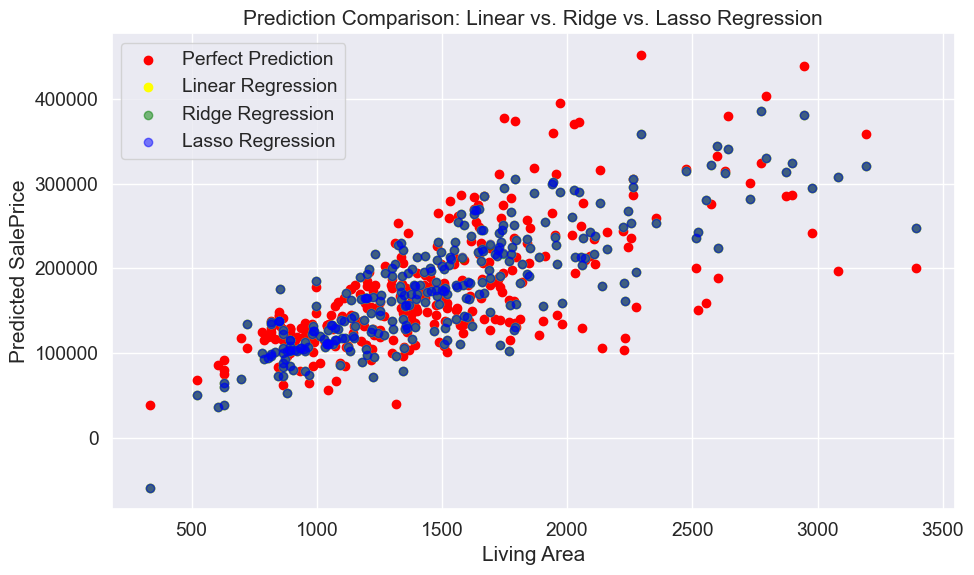

In [27]:
import matplotlib.pyplot as plt
col = 'GrLivArea'

fig = plt.figure(figsize=(10, 6))
ax = plt.gca()

# Add a reference line for a perfect prediction (y_test = predictions)
ax.scatter(X_test[col], y_test, color='red', label='Perfect Prediction')

# Create a scatter plot for Linear Regression
ax.scatter(X_test[col], linear_predictions, label='Linear Regression',
            alpha=1.0, color='yellow')

# Create a scatter plot for Ridge Regression
ax.scatter(X_test[col], ridge_predictions, label='Ridge Regression',
            alpha=0.5, color='green')

# Create a scatter plot for Lasso Regression
ax.scatter(X_test[col], lasso_predictions, label='Lasso Regression',
            alpha=0.5, color='blue')


# Set plot labels and title
ax.set_xlabel('Living Area')
ax.set_ylabel('Predicted SalePrice')
ax.set_title('Prediction Comparison: Linear vs. Ridge vs. Lasso Regression')
ax.legend()

# Show the plot
fig.tight_layout()


* How are weights calculated: [link](https://towardsdatascience.com/step-by-step-tutorial-on-linear-regression-with-stochastic-gradient-descent-1d35b088a843)

* Why is Lasso harder on coefficients in comparison to Ridge? [link](https://online.stat.psu.edu/stat508/lesson/5/5.4)

* Regression requirements: [link](https://www.youtube.com/watch?v=0MFpOQRY0rw&ab_channel=zedstatistics)

* Linear regression in sklearn: [link](https://scikit-learn.org/stable/modules/linear_model.html#linear-models)

* Lasso Regression


### Add and convert categorical columns to numerical

In [28]:
catg_strong_corr = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual',
                     'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

C:\Users\Muneeb Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Muneeb Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Muneeb Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_base.py:949: FutureWarning: When 

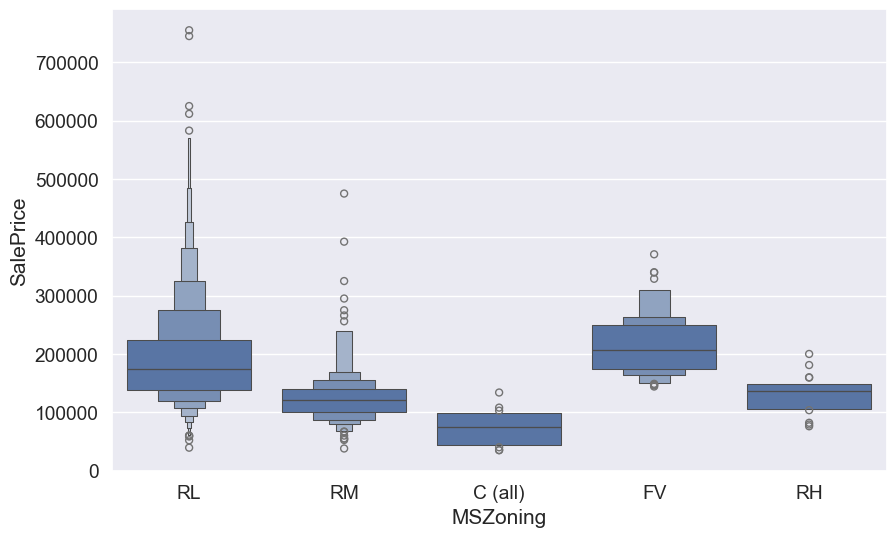

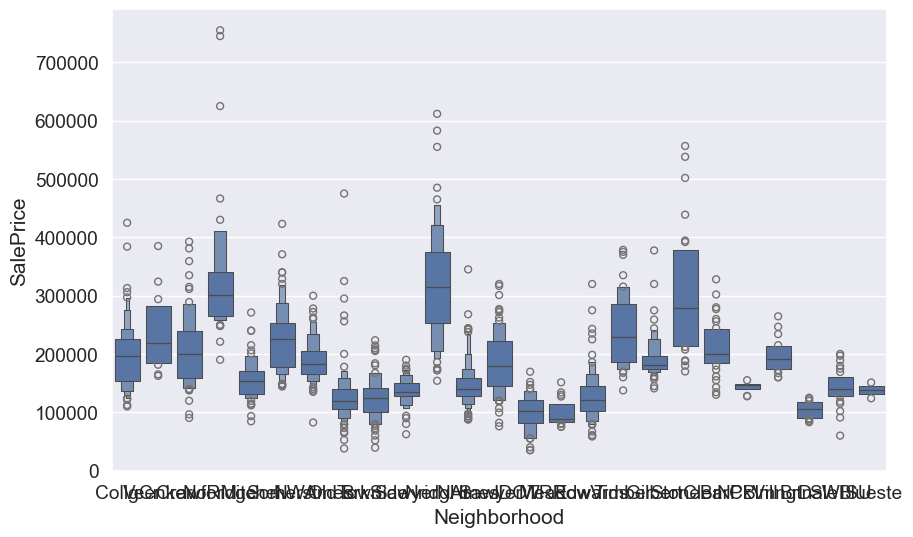

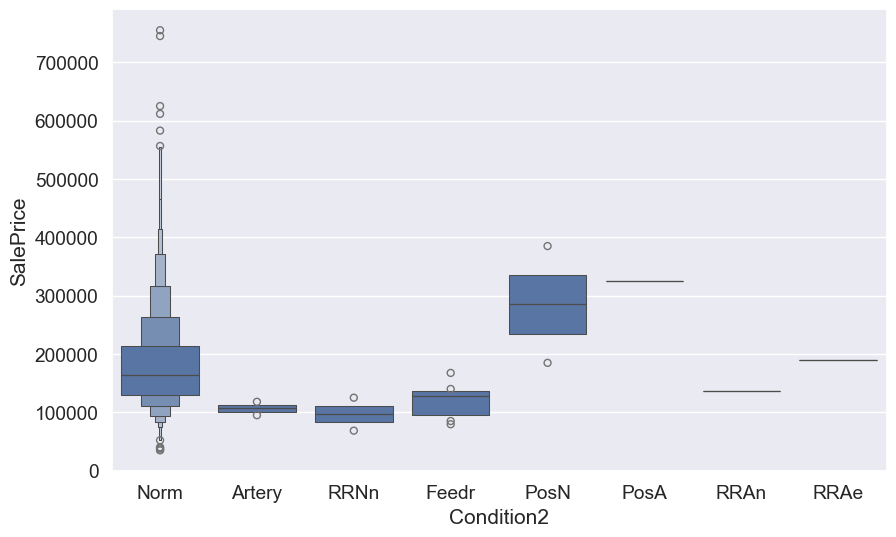

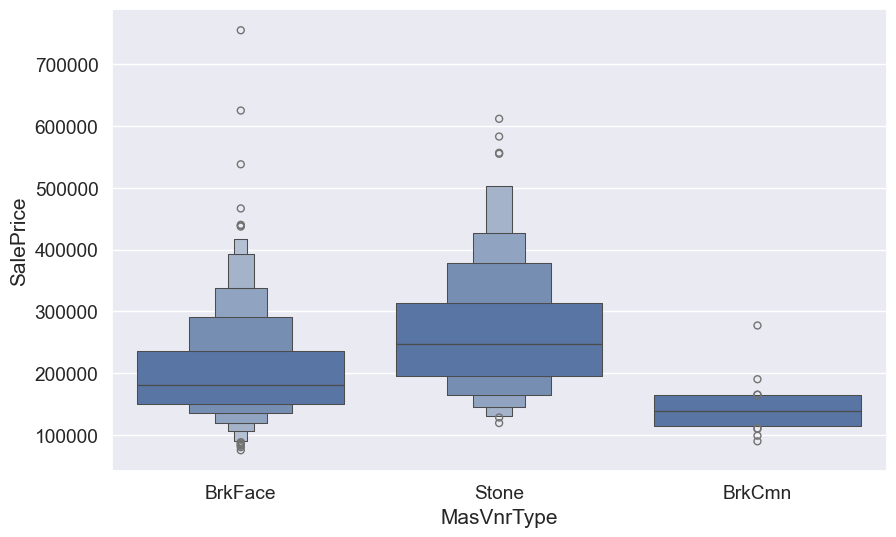

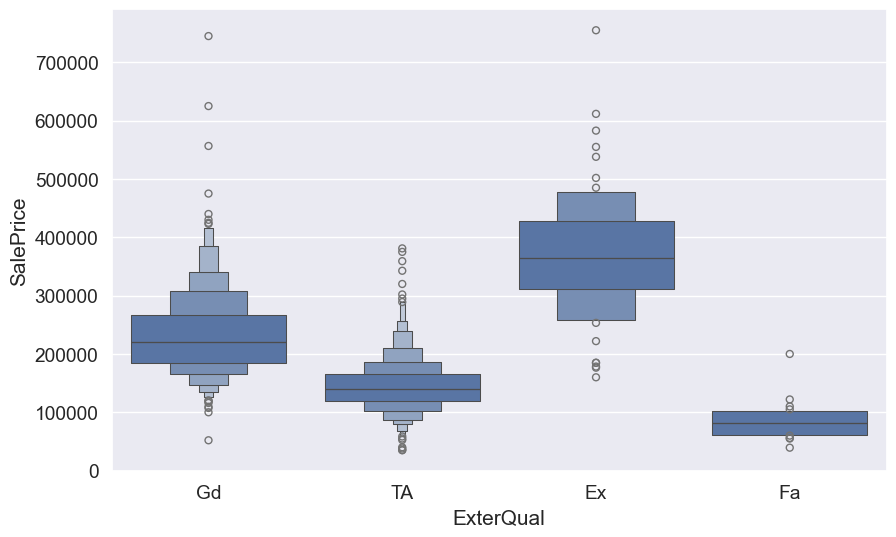

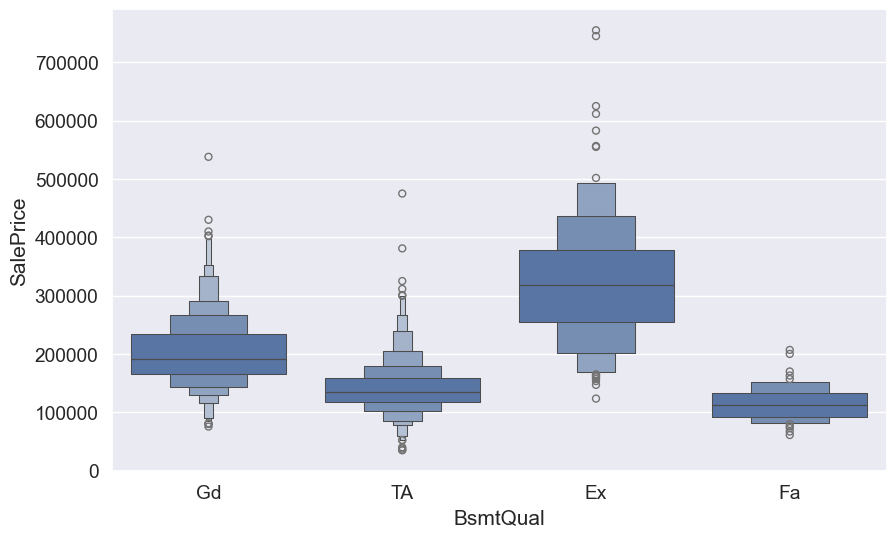

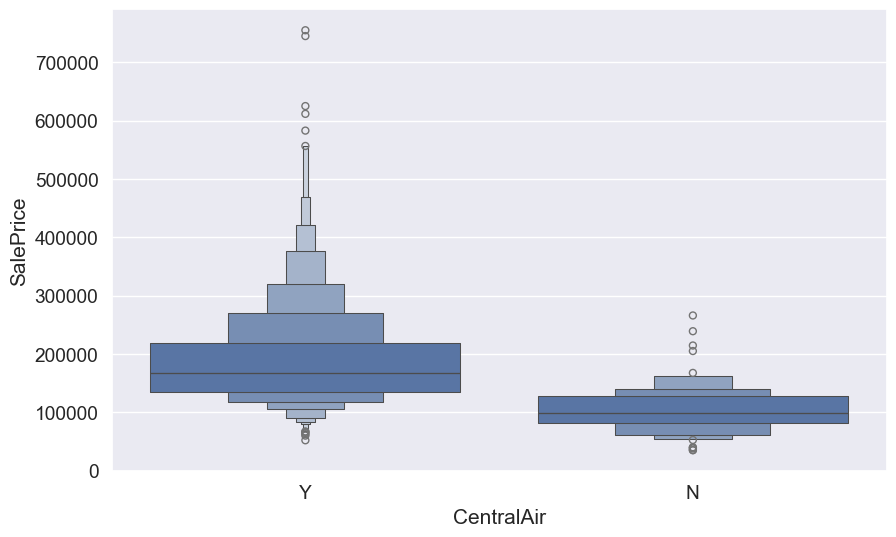

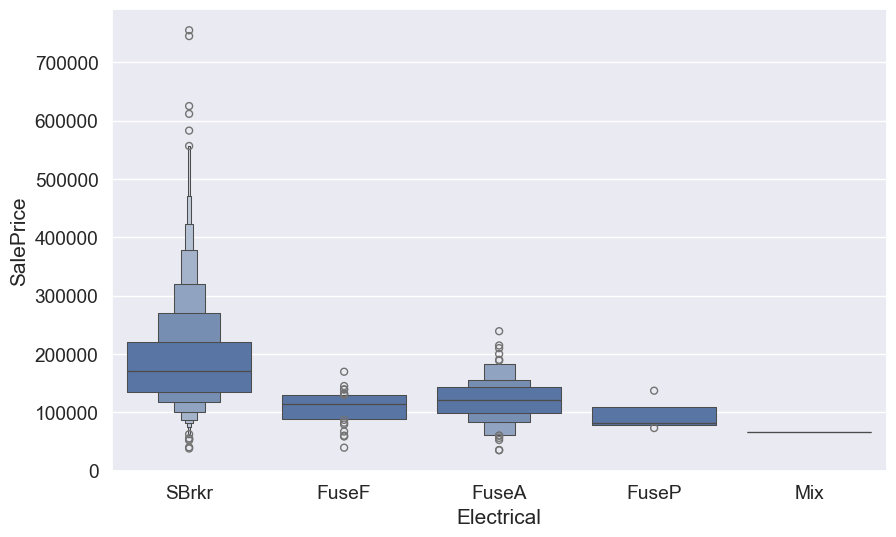

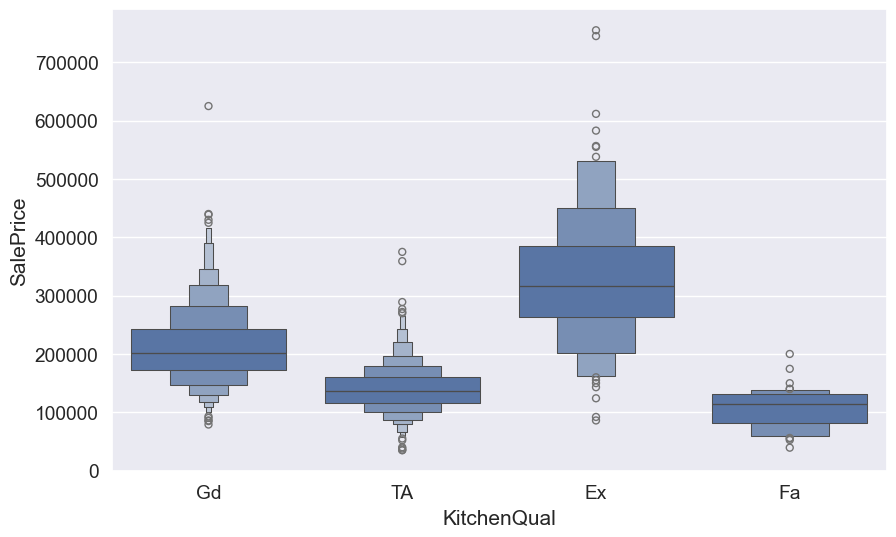

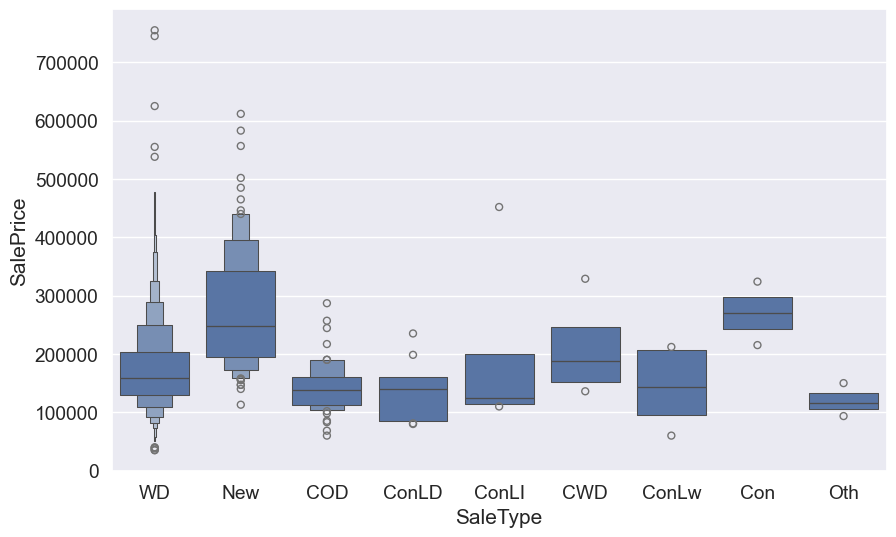

In [29]:
for catg in catg_strong_corr :
    # Set the figure size
    fig = plt.figure(figsize=(10, 6))
    sns.boxenplot(x=catg, y='SalePrice', data=df)

In [30]:
# filter the dataset based on the following columns
columns_to_use = ['LotArea', 'YrSold', 'GarageArea', 'GarageYrBlt',
                  'GrLivArea', 'OverallQual', 'ExterQual', 'YearBuilt',
                  'MSZoning', 'KitchenQual', "MasVnrArea",
                  'SalePrice', 'CentralAir',]

# save the new dataset into df_sample
df_sample = df.loc[:, columns_to_use]

In [31]:
df_sample.head()

,LotArea,YrSold,GarageArea,GarageYrBlt,GrLivArea,OverallQual,ExterQual,YearBuilt,MSZoning,KitchenQual,MasVnrArea,SalePrice,CentralAir
Id,,,,,,,,,,,,,
1,8450,2008,548,2003.0,1710,7,Gd,2003,RL,Gd,196.0,208500,Y
2,9600,2007,460,1976.0,1262,6,TA,1976,RL,TA,0.0,181500,Y
3,11250,2008,608,2001.0,1786,7,Gd,2001,RL,Gd,162.0,223500,Y
4,9550,2006,642,1998.0,1717,7,TA,1915,RL,Gd,0.0,140000,Y
5,14260,2008,836,2000.0,2198,8,Gd,2000,RL,Gd,350.0,250000,Y


In [32]:
# look into the number of nulls we have
# (sort the values to have the emptiest column on top)
nulls = df_sample.isnull().sum().sort_values(ascending=False)
nulls

GarageYrBlt    81
MasVnrArea      8
LotArea         0
YrSold          0
GarageArea      0
GrLivArea       0
OverallQual     0
ExterQual       0
YearBuilt       0
MSZoning        0
KitchenQual     0
SalePrice       0
CentralAir      0
dtype: int64

In [33]:
df_sample.loc[:, ["GarageYrBlt", "MasVnrArea"]].isna().any()

GarageYrBlt    True
MasVnrArea     True
dtype: bool

In [34]:
df_sample.loc[:, ["GarageYrBlt", "MasVnrArea"]] = df_sample.loc[:, ["GarageYrBlt", "MasVnrArea"]].fillna(df_sample.loc[:, ["GarageYrBlt", "MasVnrArea"]].mean())

In [35]:
# Check if it worked:
df_sample.loc[:,["GarageYrBlt", "MasVnrArea"]].isnull().any()

GarageYrBlt    False
MasVnrArea     False
dtype: bool

In [36]:
df_sample.head()

,LotArea,YrSold,GarageArea,GarageYrBlt,GrLivArea,OverallQual,ExterQual,YearBuilt,MSZoning,KitchenQual,MasVnrArea,SalePrice,CentralAir
Id,,,,,,,,,,,,,
1,8450,2008,548,2003.0,1710,7,Gd,2003,RL,Gd,196.0,208500,Y
2,9600,2007,460,1976.0,1262,6,TA,1976,RL,TA,0.0,181500,Y
3,11250,2008,608,2001.0,1786,7,Gd,2001,RL,Gd,162.0,223500,Y
4,9550,2006,642,1998.0,1717,7,TA,1915,RL,Gd,0.0,140000,Y
5,14260,2008,836,2000.0,2198,8,Gd,2000,RL,Gd,350.0,250000,Y


# Categorical data
sklearn.linear models cannot interpret categorical data (or any non-numeric data). Therefore, we need to encode categorical data to use in our regression models using `sklearn.preprocessing` transformers. 

Recall that categorical data can have an inherent order. We can such data "ordinal". Categorical data without any inherent order / rank is called "nominal" data. 

In [37]:
# Let's start by identifying all categorical data
catg_cols = df_sample.select_dtypes("O").columns
catg_cols

Index(['ExterQual', 'MSZoning', 'KitchenQual', 'CentralAir'], dtype='object')

In [38]:
# Hard to say which of these are ordinal without doing a deep dive into dataset. 
# For convenience, we will assume all columns with "Qual" suffix are ordinal
df_sample.filter(regex=r".*Qual$").columns

Index(['OverallQual', 'ExterQual', 'KitchenQual'], dtype='object')

In [39]:
for c in df_sample.filter(regex=r".*Qual$").columns:
    print(df_sample[c].unique())

[ 7  6  8  5  9  4 10  3  1  2]
['Gd' 'TA' 'Ex' 'Fa']
['Gd' 'TA' 'Ex' 'Fa']


In [40]:
# We can see that most of these share a common order, except OverallQual, which is already numeric and we can ignore for now. 
ordinal_col = ['ExterQual', 'KitchenQual']
nominal_cols = [c for c in df_sample.select_dtypes("O") if c not in ordinal_col]
nominal_cols

['MSZoning', 'CentralAir']

In [41]:
# One possibility is to use the LabelEncoder for our nominal data.
# This converts categories to integers which may be interpreted as having order by our model!

from sklearn.preprocessing import LabelEncoder

# create a second dataset from the first dataset
df_transformed = df_sample.copy(deep=True)  # WARNING: set deep=True to avoid shallow copy!!!

cols=['CentralAir']  # Let's just try one of our nominal columns for now
# process columns, apply LabelEncoder to categorical features
label_encoders = {k: None for k in cols}  # We may want to keep a reference to these encoders so we can reverse the encoding
for c in cols:
    label_encoders[c] = LabelEncoder()
    label_encoders[c].fit(df_transformed[c])
    df_transformed[c] = label_encoders[c].transform(df_transformed[c])


In [42]:
# How to reverse?
display(df_transformed["CentralAir"].head())
display(label_encoders["CentralAir"].inverse_transform(df_transformed["CentralAir"].head()))

Id
1    1
2    1
3    1
4    1
5    1
Name: CentralAir, dtype: int32

array(['Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [43]:
# We can also inspect the encoder directly to get human-readable labels
label_encoders["CentralAir"].classes_

### NOTE: Trailing underscore attributes are "special" variables reserved in 
# scikit-learn for attributes that are "fit" to data

array(['N', 'Y'], dtype=object)

In [44]:
df_transformed.dtypes
# Now that CentralAir data is encoded we can see only Qual suffix columns and MSZoning remain as object dtypes

LotArea          int64
YrSold           int64
GarageArea       int64
GarageYrBlt    float64
GrLivArea        int64
OverallQual      int64
ExterQual       object
YearBuilt        int64
MSZoning        object
KitchenQual     object
MasVnrArea     float64
SalePrice        int64
CentralAir       int32
dtype: object

In [45]:
# use ordinal encoder to transform ordinal data
from sklearn.preprocessing import OrdinalEncoder

order = ['Po','Fa','TA','Gd','Ex']
ordinal_encoders = {k: None for k in ordinal_col}
for col in ordinal_col:
    # use ordinal encoder on KitchenQual
    ordinal_encoders[col] = OrdinalEncoder(categories = [order])  
    # NOTE: Without a reference to this encoder we won't be able to inverse transform! food for thought
    df_transformed[col] = ordinal_encoders[col].fit_transform(df_transformed[[col]])


In [46]:
df_sample.loc[:,'KitchenQual'].values

array(['Gd', 'TA', 'Gd', ..., 'Gd', 'Gd', 'TA'], dtype=object)

In [47]:
df_transformed.loc[:,'KitchenQual'].values

array([3., 2., 3., ..., 3., 3., 2.])

In [48]:
ordinal_encoders['KitchenQual'].categories  # Note order matters....

[['Po', 'Fa', 'TA', 'Gd', 'Ex']]

In [49]:
# Specify the columns to be one-hot encoded
# This is the best option for nominal data, but beware, one-hot encoding is an
# example of sparse data (few non-zero elements). Sparse data can be particularly
# challenging for traditional machine learning due to the "curse of dimensionality"

# Perform one-hot encoding
encoded_df = pd.get_dummies(df_transformed[['MSZoning']])

# Concatenate the encoded columns with the original dataset
df_transformed = pd.concat([df_transformed, encoded_df], axis=1)

# Display the modified dataset
df_transformed

,LotArea,YrSold,GarageArea,GarageYrBlt,GrLivArea,OverallQual,ExterQual,YearBuilt,MSZoning,KitchenQual,MasVnrArea,SalePrice,CentralAir,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
Id,,,,,,,,,,,,,,,,,,
1,8450,2008,548,2003.0,1710,7,3.0,2003,RL,3.0,196.0,208500,1,False,False,False,True,False
2,9600,2007,460,1976.0,1262,6,2.0,1976,RL,2.0,0.0,181500,1,False,False,False,True,False
3,11250,2008,608,2001.0,1786,7,3.0,2001,RL,3.0,162.0,223500,1,False,False,False,True,False
4,9550,2006,642,1998.0,1717,7,2.0,1915,RL,3.0,0.0,140000,1,False,False,False,True,False
5,14260,2008,836,2000.0,2198,8,3.0,2000,RL,3.0,350.0,250000,1,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,7917,2007,460,1999.0,1647,6,2.0,1999,RL,2.0,0.0,175000,1,False,False,False,True,False
1457,13175,2010,500,1978.0,2073,6,2.0,1978,RL,2.0,119.0,210000,1,False,False,False,True,False
1458,9042,2010,252,1941.0,2340,7,4.0,1941,RL,3.0,0.0,266500,1,False,False,False,True,False


In [50]:
df_transformed.dtypes  # Any issues?

LotArea               int64
YrSold                int64
GarageArea            int64
GarageYrBlt         float64
GrLivArea             int64
OverallQual           int64
ExterQual           float64
YearBuilt             int64
MSZoning             object
KitchenQual         float64
MasVnrArea          float64
SalePrice             int64
CentralAir            int32
MSZoning_C (all)       bool
MSZoning_FV            bool
MSZoning_RH            bool
MSZoning_RL            bool
MSZoning_RM            bool
dtype: object

In [51]:
# create X and y
X = df_transformed.drop(columns=["MSZoning", "SalePrice"])
y = df['SalePrice']

# build the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
y_test

Id
893     154500
1106    325000
414     115000
523     159000
1037    315500
         ...  
480      89471
1362    260000
803     189000
652     108000
723     124500
Name: SalePrice, Length: 292, dtype: int64

In [53]:
X_train

,LotArea,YrSold,GarageArea,GarageYrBlt,GrLivArea,OverallQual,ExterQual,YearBuilt,KitchenQual,MasVnrArea,CentralAir,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
Id,,,,,,,,,,,,,,,,
255,8400,2010,294,1957.000000,1314,5,2.0,1957,2.0,0.0,1,False,False,False,True,False
1067,7837,2009,380,1993.000000,1571,6,3.0,1993,2.0,0.0,1,False,False,False,True,False
639,8777,2008,0,1978.506164,796,5,2.0,1910,2.0,0.0,1,False,False,False,True,False
800,7200,2007,240,1939.000000,1768,5,2.0,1937,3.0,252.0,1,False,False,False,True,False
381,5000,2010,308,1924.000000,1691,5,2.0,1924,3.0,0.0,1,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,9317,2007,440,2006.000000,1314,6,3.0,2006,3.0,0.0,1,False,False,False,True,False
1131,7804,2009,576,1981.000000,1981,4,2.0,1928,3.0,0.0,1,False,False,False,True,False
1295,8172,2006,572,1957.000000,864,5,2.0,1955,2.0,0.0,1,False,False,False,True,False


In [54]:
X_train.isna().any()

LotArea             False
YrSold              False
GarageArea          False
GarageYrBlt         False
GrLivArea           False
OverallQual         False
ExterQual           False
YearBuilt           False
KitchenQual         False
MasVnrArea          False
CentralAir          False
MSZoning_C (all)    False
MSZoning_FV         False
MSZoning_RH         False
MSZoning_RL         False
MSZoning_RM         False
dtype: bool

In [55]:
# Initialize and train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
linear_predictions = linear_model.predict(X_test)

# Evaluate the model
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_predictions))

print("Linear Regression:")
print(f"Mean Absolute Error: {linear_mae}")
print(f"Root Mean Squared Error: {linear_rmse}")


Linear Regression:
Mean Absolute Error: 23575.967160143722
Root Mean Squared Error: 37682.803284062575


In [56]:
# Initialize and train a Ridge regression model
ridge_model = Ridge(alpha=0.2)  # You can tune the alpha parameter
ridge_model.fit(X_train, y_train)

# Make predictions
ridge_predictions = ridge_model.predict(X_test)

# Evaluate the model
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))

print("\nRidge Regression:")
print(f"Mean Absolute Error: {ridge_mae}")
print(f"Root Mean Squared Error: {ridge_rmse}")



Ridge Regression:
Mean Absolute Error: 23576.982409960958
Root Mean Squared Error: 37684.52073824912


In [57]:
# Initialize and train a Lasso regression model
lasso_model = Lasso(alpha=0.2, max_iter=100)  # You can tune the alpha parameter
lasso_model.fit(X_train, y_train)

# Make predictions
lasso_predictions = lasso_model.predict(X_test)

# Evaluate the model
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))

print("\nLasso Regression:")
print(f"Mean Absolute Error: {lasso_mae}")
print(f"Root Mean Squared Error: {lasso_rmse}")



Lasso Regression:
Mean Absolute Error: 23576.29418632273
Root Mean Squared Error: 37683.20429473541


C:\Users\Muneeb Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.216e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


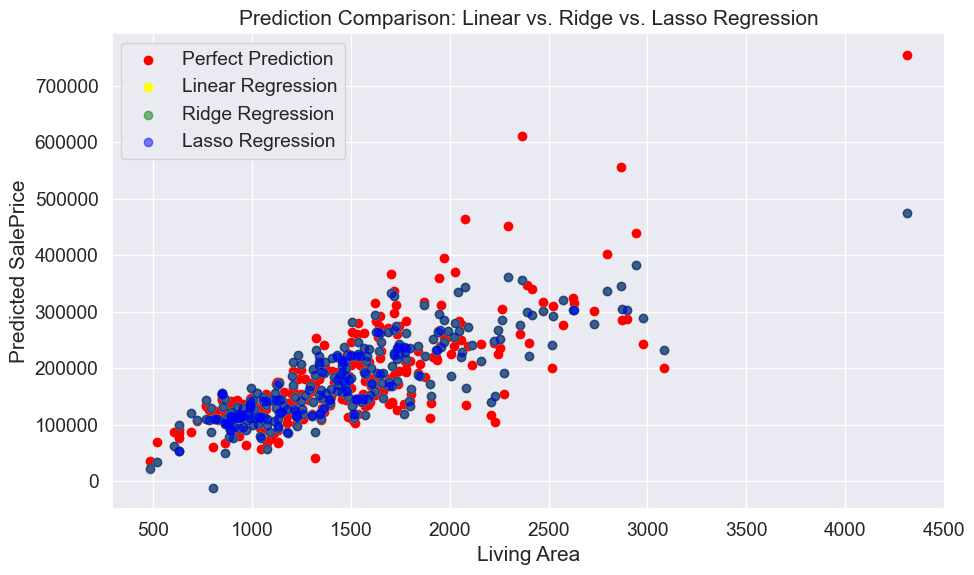

In [58]:
import matplotlib.pyplot as plt
col = 'GrLivArea'

fig = plt.figure(figsize=(10, 6))
ax = plt.gca()

# Add a reference line for a perfect prediction (y_test = predictions)
ax.scatter(X_test[col], y_test, color='red', label='Perfect Prediction')

# Create a scatter plot for Linear Regression
ax.scatter(X_test[col], linear_predictions, label='Linear Regression',
            alpha=1.0, color='yellow')

# Create a scatter plot for Ridge Regression
ax.scatter(X_test[col], ridge_predictions, label='Ridge Regression',
            alpha=0.5, color='green')

# Create a scatter plot for Lasso Regression
ax.scatter(X_test[col], lasso_predictions, label='Lasso Regression',
            alpha=0.5, color='blue')


# Set plot labels and title
ax.set_xlabel('Living Area')
ax.set_ylabel('Predicted SalePrice')
ax.set_title('Prediction Comparison: Linear vs. Ridge vs. Lasso Regression')
ax.legend()

# Show the plot
fig.tight_layout()

### Optional for now --- Food for thought

### What if we didn't have normalized features?


In [59]:
# Calculate the mean and standard deviation for each feature
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)

# Normalize the features using z-score standardization
X_normalized = (X - mean) / std_dev

# Now, X_normalized contains your normalized features
X_normalized

,LotArea,YrSold,GarageArea,GarageYrBlt,GrLivArea,OverallQual,ExterQual,YearBuilt,KitchenQual,MasVnrArea,CentralAir,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
Id,,,,,,,,,,,,,,,,
1,-0.207142,0.138777,0.351000,1.021157,0.370333,0.651479,1.052302,1.050994,0.735994,0.511418,0.263813,-0.083045,-0.215859,-0.105263,0.518133,-0.418955
2,-0.091886,-0.614439,-0.060731,-0.104483,-0.482512,-0.071836,-0.689604,0.156734,-0.771091,-0.574410,0.263813,-0.083045,-0.215859,-0.105263,0.518133,-0.418955
3,0.073480,0.138777,0.631726,0.937776,0.515013,0.651479,1.052302,0.984752,0.735994,0.323060,0.263813,-0.083045,-0.215859,-0.105263,0.518133,-0.418955
4,-0.096897,-1.367655,0.790804,0.812705,0.383659,0.651479,-0.689604,-1.863632,0.735994,-0.574410,0.263813,-0.083045,-0.215859,-0.105263,0.518133,-0.418955
5,0.375148,0.138777,1.698485,0.896086,1.299326,1.374795,1.052302,0.951632,0.735994,1.364570,0.263813,-0.083045,-0.215859,-0.105263,0.518133,-0.418955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,-0.260560,-0.614439,-0.060731,0.854395,0.250402,-0.071836,-0.689604,0.918511,-0.771091,-0.574410,0.263813,-0.083045,-0.215859,-0.105263,0.518133,-0.418955
1457,0.266407,1.645210,0.126420,-0.021102,1.061367,-0.071836,-0.689604,0.222975,-0.771091,0.084843,0.263813,-0.083045,-0.215859,-0.105263,0.518133,-0.418955
1458,-0.147810,1.645210,-1.033914,-1.563645,1.569647,0.651479,2.794208,-1.002492,0.735994,-0.574410,0.263813,-0.083045,-0.215859,-0.105263,0.518133,-0.418955


In [60]:
#  other ways of doing this
from sklearn.preprocessing import StandardScaler

# Assuming you have a numpy array called 'X' containing your features
# X.shape should be (number_of_samples, number_of_features)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to your data and transform the features
X_normalized = scaler.fit_transform(X)

# X_normalized contains your z-score standardized features
X_normalized

array([[-0.20714171,  0.13877749,  0.35100032, ..., -0.10526316,
         0.51813339, -0.41895507],
       [-0.09188637, -0.61443862, -0.06073101, ..., -0.10526316,
         0.51813339, -0.41895507],
       [ 0.07347998,  0.13877749,  0.63172623, ..., -0.10526316,
         0.51813339, -0.41895507],
       ...,
       [-0.14781027,  1.64520971, -1.03391416, ..., -0.10526316,
         0.51813339, -0.41895507],
       [-0.08016039,  1.64520971, -1.09005935, ..., -0.10526316,
         0.51813339, -0.41895507],
       [-0.05811155,  0.13877749, -0.9216238 , ..., -0.10526316,
         0.51813339, -0.41895507]])

In [61]:
from sklearn.preprocessing import MinMaxScaler

# Assuming you have a numpy array called 'X' containing your features
# X.shape should be (number_of_samples, number_of_features)

# Create a MinMaxScaler instance (by default, scales to [0, 1])
scaler = MinMaxScaler()

# Fit the scaler to your data and transform the features
X_normalized = scaler.fit_transform(X)

# X_normalized contains your min-max scaled features
X_normalized

array([[0.0334198 , 0.5       , 0.3864598 , ..., 0.        , 1.        ,
        0.        ],
       [0.03879502, 0.25      , 0.32440056, ..., 0.        , 1.        ,
        0.        ],
       [0.04650728, 0.5       , 0.42877292, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.03618687, 1.        , 0.17771509, ..., 0.        , 1.        ,
        0.        ],
       [0.03934189, 1.        , 0.16925247, ..., 0.        , 1.        ,
        0.        ],
       [0.04037019, 0.5       , 0.19464034, ..., 0.        , 1.        ,
        0.        ]])

# Your turn...

Let's use the this used car dataset: [link](https://www.kaggle.com/datasets/rishabhkarn/used-car-dataset)

We are going to try and predict the price of each car.

# Load the dataset

In [62]:
dataset_name ="rishabhkarn/used-car-dataset"
kaggle.api.dataset_download_files(dataset_name, path=_DATA_PATH, unzip=True)

In [63]:
list(_DATA_PATH.glob("*"))  # Can use .glob() on Path objects to quickly list dir contents

[WindowsPath('../data/lab-2/data_description.txt'),
 WindowsPath('../data/lab-2/house-prices-advanced-regression-techniques.zip'),
 WindowsPath('../data/lab-2/sample_submission.csv'),
 WindowsPath('../data/lab-2/test.csv'),
 WindowsPath('../data/lab-2/train.csv'),
 WindowsPath('../data/lab-2/Used Car Dataset.csv')]

In [64]:
# Read csv and print first 5 records, set column as position 0 as the index. 


# Data preprocessing

In [65]:
# Which columns have object dtypes?


In [66]:
# Rename `ownsership` to `ownership` and print head again

In [67]:
# Print the number of unique values for columns with object dtype

In [68]:
# car_name and registration year have high cardinality. Drop registration_year from the df and print head


In [69]:
# car_name has almost as many unique values as the dataset itself, this is not a very useful feature. 
# However, we can extract the make of the vehicles and set that as a new column "car_make". 
# Add the new car_make column, drop the car_name column, and print df head. 
# HINT: Use pd.DataFrame.str.split() 

In [70]:
# How many unique car_makes are there?

In [71]:
# Much better, we can work with this!
# Now, check unique values of "insurance_validity"

In [72]:
# Convert all instances of 'Third Party insurance' to 'Third Party' and reprint unique values


In [73]:
# Write a function called print_unique to print unique values and their the 
# total number of # occurrences for fuel_type, ownership, transmission,
# and manufacturing_year. Call this function


In [74]:
"""
This is a good example of how most datasets are not clean and ready to go for ML!
Let's clean these up by removing all rows with abnormal data. Drop rows where 
any of the following conditions are met
* fuel_type=="5 seats"
* ownership not in ["First Owner", "Second Owner", "Third Owner", "Fifth Owner" ]
* transmission not in ["Manual", "Automatic"]
* manufacturing_year not equal to a year

Print the new dataframe shape to confirm you dropped all required rows
"""

'\nThis is a good example of how most datasets are not clean and ready to go for ML!\nLet\'s clean these up by removing all rows with abnormal data. Drop rows where \nany of the following conditions are met\n* fuel_type=="5 seats"\n* ownership not in ["First Owner", "Second Owner", "Third Owner", "Fifth Owner" ]\n* transmission not in ["Manual", "Automatic"]\n* manufacturing_year not equal to a year\n\nPrint the new dataframe shape to confirm you dropped all required rows\n'

In [75]:
# Call the print_unique function above again to confirm we have cleaned the data


In [76]:
# Before we encode our data, let's drop any rows with missing values and print df shape


In [77]:
# OK, we are finally ready to start encoding the object data! 
# We will start by converting manufacturing_year and ownership to integers
# Convert both columns to ints and print their dtypes


In [78]:
# Note that our max index is > the length of our dataset, call reset_index to renumber the index


In [79]:
# complete the following function and call it for "car_make", "insurance_validity",
# "fuel_type", and "transmission". 
# Call the function four times, once for each column, passing the df back to the
# function each time. Print the final df once all columns have been encoded

from sklearn.preprocessing import OneHotEncoder

def ohe_feature(df: pd.DataFrame, col: str) -> pd.DataFrame:
    """Function to encode feature named "col" with OneHotEncoding. 
    
    This function one-hot encodes the feature named col, renames the one-hot columns
    as f"{col}_{value}" where value is the unique value associated with that column.
    The old col is to be dropped from the df before returning the df to the caller. 

    Args:
        df (pd.DataFrame): Dataframe to concat new columns to 
        col (str): Name of column to encode

    Returns:
        pd.DataFrame: Dataframe with new columns added and old column dropped
    """
    pass


In [80]:
# check df dtypes



In [81]:
# Great work! This data is usable by linear models! 

# EDA

In [82]:
# How many records are in the dataset?


In [83]:
# Plot correlation matrix of the following features:


features = ['seats', 'kms_driven', 'ownership', 'manufacturing_year',
       'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)', 'torque(Nm)',
       'price(in lakhs)'
]


In [84]:
# Not great, we see low correlation with price. 
# Call describe() on a slice of df with only columns with dtype == float selected


In [85]:
# Those are very large outliers! Print the 95% quantile for all columns with float dtype


In [86]:
# Let's clip any values over to the 95% quantile. Call describe on these columns again to check


In [87]:
# Great, note that max values now match 95% quantiles above. Also note big reduction in std

In [88]:
# We can also see that max_power and engine are the same, drop the engine(cc) column



In [89]:
# Plot correlation matrix of the following features:

features = ['seats', 'kms_driven', 'ownership', 'manufacturing_year',
       'mileage(kmpl)', 'max_power(bhp)', 'torque(Nm)',
       'price(in lakhs)'
]


In [90]:
# Nice, much higher correlations now that we clipped outliers!

# Modelling

In [91]:
# Split into X_train, X_test, y_train, y_test with test_size=0.2 and random_state=42
# NOTE: target column is 'price(in lakhs)'
# Print X_train head()
random_state=42
test_size=0.2


In [92]:
# Let's scale all the continuous features (floats)
# Using a StandardScaler, call .fit_transform on X_train and .transform on X_test
# Print X_test.head() for comparison



In [93]:
# Now let's try using a linear regressor model. Call .fit() on train data and
# store predictions for X_test in variable called y_pred
# Print mean squared error 


In [94]:
# Plot y_test vs. y_pred on a scatter plot
# Add a line plot in red where y_test = y_test to show the line of perfect predictions
# Label your series, add axis labels, and a legend


In [95]:
# What are the top 3 features with the largest coefficients in the linear regressor model?
# Hint, can use sklearn.feature_selection classes OR lr.coef_ directly


In [96]:
# Pretty good features to use in my opinion! 

# 